In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

In [3]:
cats

array([[ 64,  23, 250, ...,  60, 223, 101],
       [ 64,  23, 250, ...,  50, 224, 107],
       [ 64,  20, 250, ...,  63, 225, 106],
       ...,
       [ 64,  31, 244, ..., 105, 180, 114],
       [ 64,  23, 232, ..., 118, 182,  91],
       [ 61,   9, 244, ..., 104, 177, 113]])

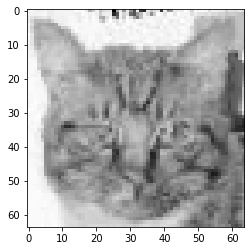

In [14]:
plt.imshow(cats[:,45].reshape(64,64).T, cmap="gray")

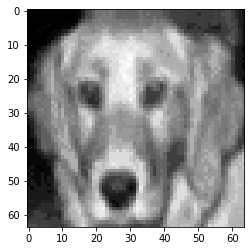

In [16]:
plt.imshow(dogs[:,36].reshape(64,64).T, cmap="gray")

In [17]:
pepe = dogs[:,36].reshape(64,64).T

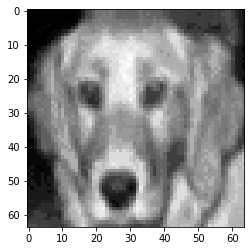

In [52]:
plt.imshow(pepe, cmap="gray")

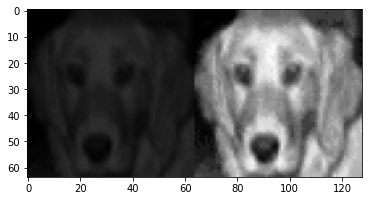

In [56]:
plt.imshow(np.concatenate([pepe,pepe*5], axis=1), cmap="gray")

In [62]:
def normalize(data):
    return data/np.max(data,axis=0)

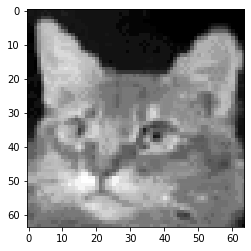

In [66]:
plt.imshow(normalize(cats)[:,1].reshape(64,64).T,cmap="gray")

In [69]:
dogs = normalize(dogs)
cats = normalize(cats)
pets = np.concatenate([dogs,cats],axis=1)

In [74]:
pets = pets.T

In [83]:
colors = ["red"]*80+["blue"]*80

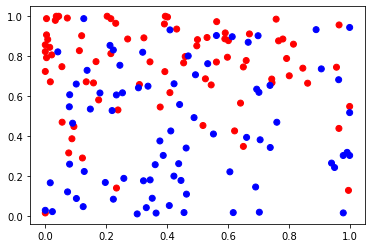

In [85]:
plt.scatter(pets[:,1],pets[:,2000], c=colors)

In [82]:
len(pets[:,1])

160

In [86]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=2)

In [100]:
pets_2d = pca.fit_transform(pets)

In [101]:
pets_2d

array([[ 11.52781003,  -7.45233492],
       [ -5.10006645, -11.34668161],
       [  3.54777625,   3.30733919],
       [ -8.80184712,  -4.05389533],
       [  4.97858763,  -5.43668882],
       [ -1.56152265,   0.96712491],
       [ -4.05839491,  -5.93628499],
       [ -2.88089257,  -5.83773883],
       [  1.86245156,  -3.30019425],
       [  6.28855017,  -8.12961927],
       [ -3.2334406 ,  -1.78815672],
       [  5.75474023,  -2.15738227],
       [ -7.24793695,  -3.53608758],
       [  9.26793908,   2.67136673],
       [  2.31139649,  -5.24829949],
       [ -1.03022626,  -4.77990938],
       [  6.00623764,  -2.00725241],
       [ -3.87889077, -12.30984735],
       [  1.30285727,  -4.21932489],
       [  2.76634897,  -5.97071211],
       [  4.387512  ,   1.09009629],
       [ -2.9348281 ,  -2.73418873],
       [ 11.7857027 ,   0.6574585 ],
       [-10.33946622,  -7.45373541],
       [ -5.87109894,  -9.89556129],
       [ -9.92054003,  -4.2454432 ],
       [ 10.07495038,   2.83153439],
 

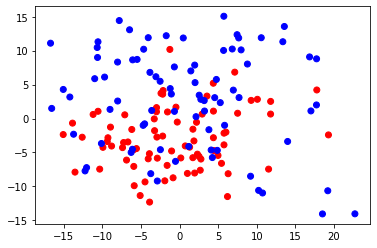

In [102]:
plt.scatter(pets_2d[:,0],pets_2d[:,1],c=colors)

In [103]:
from mpl_toolkits.mplot3d import axes3d

In [109]:
pca = PCA(n_components=3)
pets_3d = pca.fit_transform(pets)

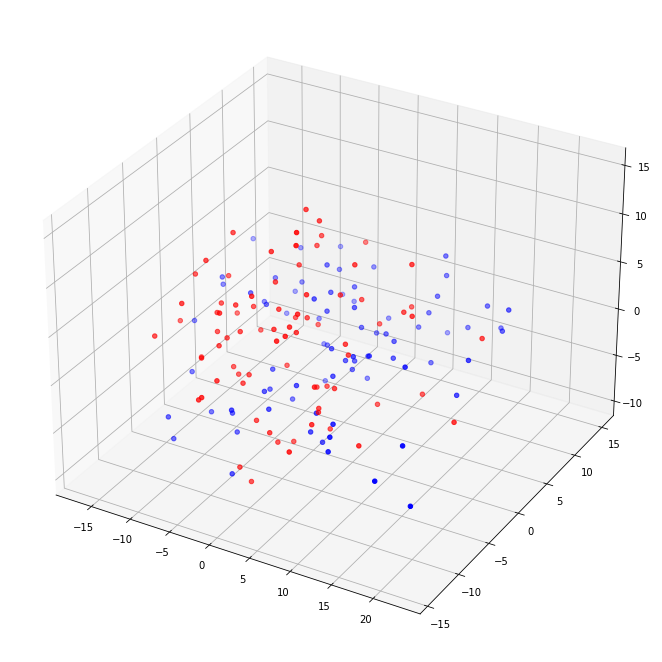

In [113]:
fig = plt.figure(figsize=(9,9))
ax = axes3d.Axes3D(fig)
ax.scatter3D(pets_3d[:,0],pets_3d[:,1],pets_3d[:,2],c=colors)

In [114]:
X = pets
y = ["dog"]*80+["cat"]*80

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [150]:
model = RandomForestClassifier()
# Bagging

In [151]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
len(model.estimators_)

100

In [152]:
confusion_matrix(y_train,model.predict(X_train))

array([[61,  0],
       [ 0, 59]])

In [153]:
confusion_matrix(y_test,model.predict(X_test))

array([[16,  3],
       [ 3, 18]])

In [167]:
params = {
    "n_estimators": range(20,200,10),
    "max_depth": range(3,10),
}

In [168]:
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5,verbose=3)

In [169]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.708, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........ max_depth=3, n_estimators=20, score=0.792, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.625, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ max_depth=3, n_estimators=20, score=0.833, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.875, total=   0.1s
[CV] max_depth=3, n_estimators=30 ....................................
[CV] ........ max_depth=3, n_estimators=30, score=0.750, total=   0.2s
[CV] max_depth=3, n_estimators=30 ....................................
[CV] ........ max_depth=3, n_estimators=30, score=0.875, total=   0.2s
[CV] max_depth=3, n_estimators=30 ....................................
[CV] ........ max_depth=3, n_estimators=30, score=0.792, total=   0.2s
[CV] max_depth=3, n_estimators=30 ....................................
[CV] ........ max_depth=3, n_estimators=30, score=0.792, total=   0.2s
[CV] max_depth=3, n_estimators=30 ....................................
[CV] ........ max_depth=3, n_estimators=30, score=0.708, total=   0.2s
[CV] max_depth=3, n_estimators=40 ....................................
[CV] .

[CV] ....... max_depth=3, n_estimators=140, score=0.917, total=   0.6s
[CV] max_depth=3, n_estimators=140 ...................................
[CV] ....... max_depth=3, n_estimators=140, score=0.625, total=   0.6s
[CV] max_depth=3, n_estimators=140 ...................................
[CV] ....... max_depth=3, n_estimators=140, score=0.792, total=   0.6s
[CV] max_depth=3, n_estimators=140 ...................................
[CV] ....... max_depth=3, n_estimators=140, score=0.792, total=   0.7s
[CV] max_depth=3, n_estimators=150 ...................................
[CV] ....... max_depth=3, n_estimators=150, score=0.792, total=   0.6s
[CV] max_depth=3, n_estimators=150 ...................................
[CV] ....... max_depth=3, n_estimators=150, score=0.833, total=   0.7s
[CV] max_depth=3, n_estimators=150 ...................................
[CV] ....... max_depth=3, n_estimators=150, score=0.708, total=   0.6s
[CV] max_depth=3, n_estimators=150 ...................................
[CV] .

[CV] ........ max_depth=4, n_estimators=70, score=0.792, total=   0.3s
[CV] max_depth=4, n_estimators=80 ....................................
[CV] ........ max_depth=4, n_estimators=80, score=0.833, total=   0.4s
[CV] max_depth=4, n_estimators=80 ....................................
[CV] ........ max_depth=4, n_estimators=80, score=0.875, total=   0.4s
[CV] max_depth=4, n_estimators=80 ....................................
[CV] ........ max_depth=4, n_estimators=80, score=0.708, total=   0.4s
[CV] max_depth=4, n_estimators=80 ....................................
[CV] ........ max_depth=4, n_estimators=80, score=0.708, total=   0.4s
[CV] max_depth=4, n_estimators=80 ....................................
[CV] ........ max_depth=4, n_estimators=80, score=0.792, total=   0.4s
[CV] max_depth=4, n_estimators=90 ....................................
[CV] ........ max_depth=4, n_estimators=90, score=0.750, total=   0.4s
[CV] max_depth=4, n_estimators=90 ....................................
[CV] .

[CV] ....... max_depth=4, n_estimators=190, score=0.708, total=   0.7s
[CV] max_depth=4, n_estimators=190 ...................................
[CV] ....... max_depth=4, n_estimators=190, score=0.792, total=   0.8s
[CV] max_depth=4, n_estimators=190 ...................................
[CV] ....... max_depth=4, n_estimators=190, score=0.875, total=   0.8s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.750, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.792, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.542, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.875, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] .

[CV] ....... max_depth=5, n_estimators=130, score=0.833, total=   0.5s
[CV] max_depth=5, n_estimators=130 ...................................
[CV] ....... max_depth=5, n_estimators=130, score=0.917, total=   0.5s
[CV] max_depth=5, n_estimators=130 ...................................
[CV] ....... max_depth=5, n_estimators=130, score=0.708, total=   0.5s
[CV] max_depth=5, n_estimators=130 ...................................
[CV] ....... max_depth=5, n_estimators=130, score=0.792, total=   0.5s
[CV] max_depth=5, n_estimators=130 ...................................
[CV] ....... max_depth=5, n_estimators=130, score=0.792, total=   0.5s
[CV] max_depth=5, n_estimators=140 ...................................
[CV] ....... max_depth=5, n_estimators=140, score=0.750, total=   0.5s
[CV] max_depth=5, n_estimators=140 ...................................
[CV] ....... max_depth=5, n_estimators=140, score=0.833, total=   0.6s
[CV] max_depth=5, n_estimators=140 ...................................
[CV] .

[CV] ........ max_depth=6, n_estimators=60, score=0.792, total=   0.3s
[CV] max_depth=6, n_estimators=60 ....................................
[CV] ........ max_depth=6, n_estimators=60, score=0.833, total=   0.3s
[CV] max_depth=6, n_estimators=70 ....................................
[CV] ........ max_depth=6, n_estimators=70, score=0.750, total=   0.3s
[CV] max_depth=6, n_estimators=70 ....................................
[CV] ........ max_depth=6, n_estimators=70, score=0.875, total=   0.3s
[CV] max_depth=6, n_estimators=70 ....................................
[CV] ........ max_depth=6, n_estimators=70, score=0.708, total=   0.3s
[CV] max_depth=6, n_estimators=70 ....................................
[CV] ........ max_depth=6, n_estimators=70, score=0.792, total=   0.3s
[CV] max_depth=6, n_estimators=70 ....................................
[CV] ........ max_depth=6, n_estimators=70, score=0.792, total=   0.3s
[CV] max_depth=6, n_estimators=80 ....................................
[CV] .

[CV] ....... max_depth=6, n_estimators=180, score=0.917, total=   0.8s
[CV] max_depth=6, n_estimators=180 ...................................
[CV] ....... max_depth=6, n_estimators=180, score=0.708, total=   0.7s
[CV] max_depth=6, n_estimators=180 ...................................
[CV] ....... max_depth=6, n_estimators=180, score=0.833, total=   0.7s
[CV] max_depth=6, n_estimators=180 ...................................
[CV] ....... max_depth=6, n_estimators=180, score=0.833, total=   0.7s
[CV] max_depth=6, n_estimators=190 ...................................
[CV] ....... max_depth=6, n_estimators=190, score=0.750, total=   0.8s
[CV] max_depth=6, n_estimators=190 ...................................
[CV] ....... max_depth=6, n_estimators=190, score=0.875, total=   0.7s
[CV] max_depth=6, n_estimators=190 ...................................
[CV] ....... max_depth=6, n_estimators=190, score=0.667, total=   0.8s
[CV] max_depth=6, n_estimators=190 ...................................
[CV] .

[CV] ....... max_depth=7, n_estimators=110, score=0.833, total=   0.5s
[CV] max_depth=7, n_estimators=120 ...................................
[CV] ....... max_depth=7, n_estimators=120, score=0.792, total=   0.5s
[CV] max_depth=7, n_estimators=120 ...................................
[CV] ....... max_depth=7, n_estimators=120, score=0.833, total=   0.5s
[CV] max_depth=7, n_estimators=120 ...................................
[CV] ....... max_depth=7, n_estimators=120, score=0.750, total=   0.5s
[CV] max_depth=7, n_estimators=120 ...................................
[CV] ....... max_depth=7, n_estimators=120, score=0.833, total=   0.5s
[CV] max_depth=7, n_estimators=120 ...................................
[CV] ....... max_depth=7, n_estimators=120, score=0.833, total=   0.5s
[CV] max_depth=7, n_estimators=130 ...................................
[CV] ....... max_depth=7, n_estimators=130, score=0.833, total=   0.5s
[CV] max_depth=7, n_estimators=130 ...................................
[CV] .

[CV] ........ max_depth=8, n_estimators=50, score=0.667, total=   0.2s
[CV] max_depth=8, n_estimators=50 ....................................
[CV] ........ max_depth=8, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=8, n_estimators=50 ....................................
[CV] ........ max_depth=8, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=8, n_estimators=60 ....................................
[CV] ........ max_depth=8, n_estimators=60, score=0.792, total=   0.3s
[CV] max_depth=8, n_estimators=60 ....................................
[CV] ........ max_depth=8, n_estimators=60, score=0.833, total=   0.3s
[CV] max_depth=8, n_estimators=60 ....................................
[CV] ........ max_depth=8, n_estimators=60, score=0.750, total=   0.3s
[CV] max_depth=8, n_estimators=60 ....................................
[CV] ........ max_depth=8, n_estimators=60, score=0.833, total=   0.2s
[CV] max_depth=8, n_estimators=60 ....................................
[CV] .

[CV] ....... max_depth=8, n_estimators=170, score=0.708, total=   0.7s
[CV] max_depth=8, n_estimators=170 ...................................
[CV] ....... max_depth=8, n_estimators=170, score=0.875, total=   0.9s
[CV] max_depth=8, n_estimators=170 ...................................
[CV] ....... max_depth=8, n_estimators=170, score=0.792, total=   0.8s
[CV] max_depth=8, n_estimators=170 ...................................
[CV] ....... max_depth=8, n_estimators=170, score=0.833, total=   0.9s
[CV] max_depth=8, n_estimators=170 ...................................
[CV] ....... max_depth=8, n_estimators=170, score=0.833, total=   0.8s
[CV] max_depth=8, n_estimators=180 ...................................
[CV] ....... max_depth=8, n_estimators=180, score=0.792, total=   0.8s
[CV] max_depth=8, n_estimators=180 ...................................
[CV] ....... max_depth=8, n_estimators=180, score=0.875, total=   0.8s
[CV] max_depth=8, n_estimators=180 ...................................
[CV] .

[CV] ....... max_depth=9, n_estimators=100, score=0.708, total=   0.3s
[CV] max_depth=9, n_estimators=100 ...................................
[CV] ....... max_depth=9, n_estimators=100, score=0.875, total=   0.4s
[CV] max_depth=9, n_estimators=110 ...................................
[CV] ....... max_depth=9, n_estimators=110, score=0.833, total=   0.4s
[CV] max_depth=9, n_estimators=110 ...................................
[CV] ....... max_depth=9, n_estimators=110, score=0.833, total=   0.4s
[CV] max_depth=9, n_estimators=110 ...................................
[CV] ....... max_depth=9, n_estimators=110, score=0.708, total=   0.4s
[CV] max_depth=9, n_estimators=110 ...................................
[CV] ....... max_depth=9, n_estimators=110, score=0.750, total=   0.4s
[CV] max_depth=9, n_estimators=110 ...................................
[CV] ....... max_depth=9, n_estimators=110, score=0.792, total=   0.4s
[CV] max_depth=9, n_estimators=120 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:  4.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': range(20, 200, 10)},
             verbose=3)

In [170]:
best = gs.best_estimator_
best

RandomForestClassifier(max_depth=4, n_estimators=60)

In [173]:
confusion_matrix(y_train,best.predict(X_train))

array([[61,  0],
       [ 0, 59]])

In [174]:
confusion_matrix(y_test,best.predict(X_test))

array([[16,  3],
       [ 4, 17]])

## Further resources
- [When to standardize](https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html#:~:text=It%20is%20necessary%20to%20standardize,coefficients%20associated%20to%20each%20variable.&text=The%20result%20of%20centering%20the,applies%20equally%20to%20ridge%20regression.)
- [Google Developer's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro)